# Data Analysis
## Linear Regressions Analysis (USA_HOUSING)
### James Bond 12/17/2019

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [3]:
US_house = pd.read_csv("./USA_Housing.csv")

In [4]:
print(f"Data Shape: {US_house.shape}")

Data Shape: (5000, 7)


In [5]:
print(US_house.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')


### first five rows of the data set

In [6]:
US_house.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


### Description & Info

In [7]:
print(US_house.describe)

<bound method NDFrame.describe of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0       

In [7]:
print(US_house.info)

<bound method DataFrame.info of       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0         

## Comparisons Between Ave. Income & Price of House
### While Test Size is 20%

In [8]:
X = US_house['Avg. Area Income'].values
y = US_house['Price'].values

In [9]:
X

array([79545.45857432, 79248.64245483, 61287.06717866, ...,
       63390.6868855 , 68001.33123509, 65510.58180367])

In [14]:
X=X.reshape(-1,1)
X

array([[79545.45857432],
       [79248.64245483],
       [61287.06717866],
       ...,
       [63390.6868855 ],
       [68001.33123509],
       [65510.58180367]])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=100)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (4000, 1)
y_train shape (4000,)
X_test shape (1000, 1)
y_test shape (1000,)
[ 800809.13168613 1620949.4369106  1219637.36651886 1172133.48684149
  864483.75849638 1153135.22029401 1178272.29747728  821859.06572785
 1266947.26397664 1636559.24060426 1085494.82011087  995783.16248321
 1096938.42790984 1702528.79401861 1443027.26306137  826306.14792423
 2115010.70359761 1112286.04638504 1094069.79812154  905328.7691457
  782656.08041957 1341722.83596915 2119176.26193328 1543966.42644823
  717213.26879895 1538039.5989439  1823498.40687621  964596.74983993
 1593331.70871016  877247.24536775 1111108.50121858 1313304.58773627
 1123753.73420143 1376714.67419885 1988563.99326237 1874415.10704969
 1732196.21679656 1502443.22975094 1078779.49709872  705100.51155545
 1595620.55713363 1814462.35050116 1610577.49664142 1012262.71165943
 1212939.95351759  934408.71428136 1363086.90453256 1450996.03817929
 1850525.57299623 1796009.50404616 1381117.70135143 1139014.19364814
 1738788.38189

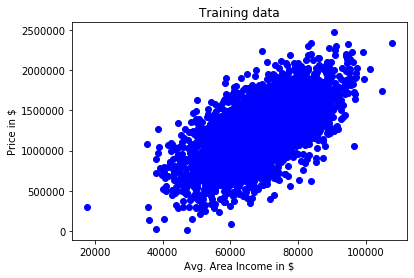

In [16]:
%matplotlib inline
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('Avg. Area Income in $' )
plt.ylabel('Price in $')
plt.title('Training data')
plt.show()

In [17]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 40.09 %
Test accuracy 44.23 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

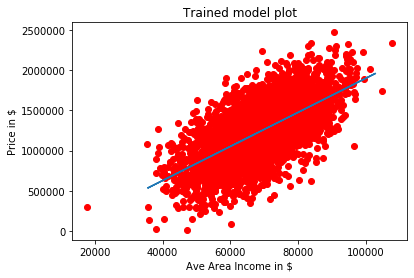

In [18]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("Ave Area Income in $")
plt.ylabel("Price in $")
plt.title("Trained model plot")
plt.plot

## Comparisons Between Ave. Income & Price of House
### While Test Size is 10%


In [19]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=500)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (4500, 1)
y_train shape (4500,)
X_test shape (500, 1)
y_test shape (500,)
[1417403.31186057  946943.03621714 1340769.76782914 1119992.61883545
 1650342.13064281 1309860.05880418  727866.52516791  852703.26367575
 1405495.70997487 1137685.11628548 1111307.06454511 1159953.5929205
 1222041.01583291 1708127.57806546  855667.17930278 1317167.71329326
 1578146.33993396 1529711.13978269  685880.32127708 1035171.0596408
 1281741.16338047  717273.18525768 1007596.04257483 1530480.68787316
  513215.98823141  569876.77488063  737147.09432418 1409943.30299484
 1296223.70649253 1557914.88977842 1214986.88571544 1162191.79102908
 1329007.20344815 1271396.51800598 1115627.78034952 1706291.99055932
  628870.34564063 1935172.99502019  790802.80103481 1020268.85454366
 1364363.3753659  1159699.96572003 1038153.94873246  673571.34601003
 1283590.45887276  414571.22293662 1326481.67468515  935488.6064948
 1469561.6746954  1209445.22037353  677772.34531757  895441.02214389
 1742922.63977119 

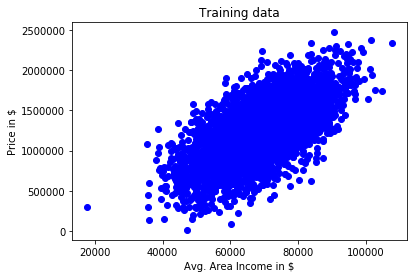

In [20]:
%matplotlib inline
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('Avg. Area Income in $' )
plt.ylabel('Price in $')
plt.title('Training data')
plt.show()

In [21]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 40.97 %
Test accuracy 40.23 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

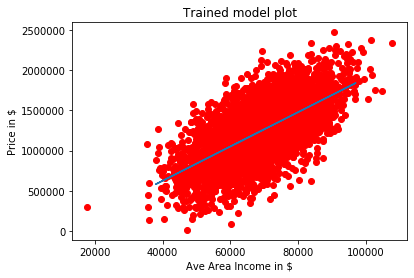

In [22]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("Ave Area Income in $")
plt.ylabel("Price in $")
plt.title("Trained model plot")
plt.plot

## Comparisons Between Ave. Income & Price of House
### While Test Size is 30%

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100000)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (3500, 1)
y_train shape (3500,)
X_test shape (1500, 1)
y_test shape (1500,)
[1525533.40662551 1369006.11488144 1096912.03579858 ... 1154917.39361164
 1214262.69927372 1023595.11287068]


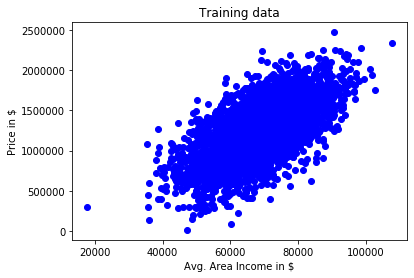

In [24]:
%matplotlib inline
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('Avg. Area Income in $' )
plt.ylabel('Price in $')
plt.title('Training data')
plt.show()

In [25]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 40.03 %
Test accuracy 42.94 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

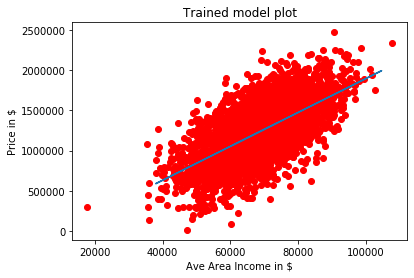

In [26]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("Ave Area Income in $")
plt.ylabel("Price in $")
plt.title("Trained model plot")
plt.plot

## Comparisons Price of House & Area Population 
### While Test Size is 10%

In [27]:
X = US_house['Area Population'].values
y = US_house['Price'].values

In [28]:
X

array([23086.80050269, 40173.07217364, 36882.1593997 , ...,
       33266.14548965, 42625.62015585, 46501.28380314])

In [29]:
X=X.reshape(-1,1)
X

array([[23086.80050269],
       [40173.07217364],
       [36882.1593997 ],
       ...,
       [33266.14548965],
       [42625.62015585],
       [46501.28380314]])

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=100)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shap {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (4500, 1)
y_train shape (4500,)
X_test shap (500, 1)
y_test shape (500,)
[ 800809.13168613 1620949.4369106  1219637.36651886 1172133.48684149
  864483.75849638 1153135.22029401 1178272.29747728  821859.06572785
 1266947.26397664 1636559.24060426 1085494.82011087  995783.16248321
 1096938.42790984 1702528.79401861 1443027.26306137  826306.14792423
 2115010.70359761 1112286.04638504 1094069.79812154  905328.7691457
  782656.08041957 1341722.83596915 2119176.26193328 1543966.42644823
  717213.26879895 1538039.5989439  1823498.40687621  964596.74983993
 1593331.70871016  877247.24536775 1111108.50121858 1313304.58773627
 1123753.73420143 1376714.67419885 1988563.99326237 1874415.10704969
 1732196.21679656 1502443.22975094 1078779.49709872  705100.51155545
 1595620.55713363 1814462.35050116 1610577.49664142 1012262.71165943
 1212939.95351759  934408.71428136 1363086.90453256 1450996.03817929
 1850525.57299623 1796009.50404616 1381117.70135143 1139014.19364814
 1738788.38189407

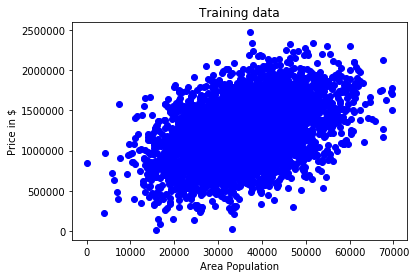

In [31]:
%matplotlib inline
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('Area Population')
plt.ylabel('Price in $')
plt.title('Training data')
plt.show()

In [32]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 17.11 %
Test accuracy 12.9 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

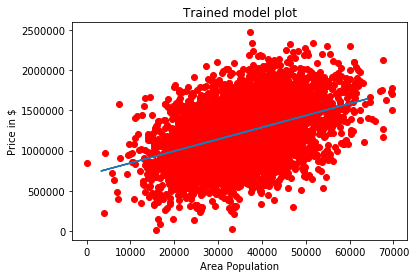

In [33]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("Area Population")
plt.ylabel("Price in $")
plt.title("Trained model plot")
plt.plot

## Comparisons Price of House & Area Population 
### While Test Size is 20%

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=1000)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shap {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (4000, 1)
y_train shape (4000,)
X_test shap (1000, 1)
y_test shape (1000,)
[1277380.52860853  849153.12252829 1224397.42724927 2016910.73970733
  956435.26333485  979568.62854125 1852584.52301333 1246410.34057798
 1419345.60730258 1273629.12431665 1942640.26532281 1270297.54493105
 1200539.36116778 1315684.45666532 1641030.47799275 1433260.22774188
 1218264.02086233 1285933.40840668 1344869.27970649 1297619.34829872
 1481146.95049889  975005.77366035 1810782.41345475  919926.99852372
 1501303.96414075 1288490.26844093 1270869.78317192 2017174.98942263
 1553592.97994692  946821.33694587 1578493.70778387 1314348.69921002
  901752.68045154  664465.3309874  1707045.72215806  914136.5197753
 1397564.15628244 1066279.87934336 1564125.23794177 1587357.94643058
 1366405.9719604  1230097.45094501 1391303.78687125 1072704.89021544
  962551.03714019 1375633.3727061  1574084.92698374 1568181.61446469
 1265760.20024252 1080735.98406921 1025705.13431974 1698198.75137
  606863.1414739  

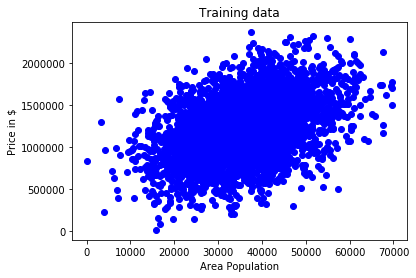

In [35]:
%matplotlib inline
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('Area Population')
plt.ylabel('Price in $')
plt.title('Training data')
plt.show()

In [36]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 17.33 %
Test accuracy 14.17 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

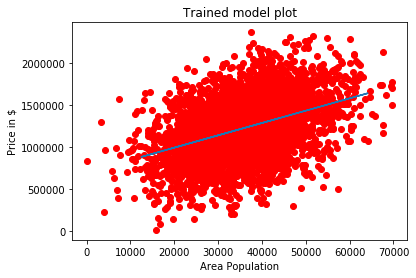

In [37]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("Area Population")
plt.ylabel("Price in $")
plt.title("Trained model plot")
plt.plot

## Comparisons Price of House & Area Population 
### While Test Size is 30%

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shap {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (3500, 1)
y_train shape (3500,)
X_test shap (1500, 1)
y_test shape (1500,)
[ 800809.13168613 1620949.4369106  1219637.36651886 ... 1647216.59366445
  412057.44010889  942508.96223867]


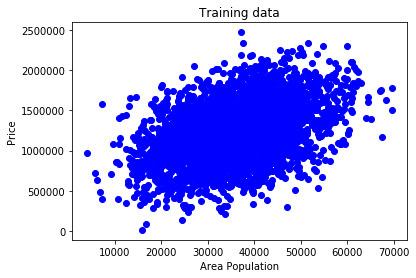

In [39]:
%matplotlib inline
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('Area Population')
plt.ylabel('Price')
plt.title('Training data')
plt.show()

In [40]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 16.72 %
Test accuracy 16.62 %


In [ ]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("Area Population")
plt.ylabel("Price in $")
plt.title("Trained model plot")
plt.plot

## Comparisons Ave. Income & Ave. Area of Bedrooms
### While Test Size is 10%

In [41]:
X = US_house['Avg. Area Income'].values
y = US_house['Avg. Area Number of Rooms'].values

In [42]:
X

array([79545.45857432, 79248.64245483, 61287.06717866, ...,
       63390.6868855 , 68001.33123509, 65510.58180367])

In [43]:
X=X.reshape(-1,1)
X

array([[79545.45857432],
       [79248.64245483],
       [61287.06717866],
       ...,
       [63390.6868855 ],
       [68001.33123509],
       [65510.58180367]])

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.9,test_size=0.1,random_state=1000)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shap {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (4500, 1)
y_train shape (4500,)
X_test shap (500, 1)
y_test shape (500,)
[7.67098283 6.02452319 7.65651167 8.76661274 6.46252334 6.52222048
 8.50065931 6.03645802 7.13125578 7.22911211 7.88847287 5.96140678
 5.16486548 6.65816348 8.56001888 8.54176845 7.3182145  7.316551
 8.46146827 6.9096769  7.74683647 6.15220352 8.8615771  7.8410663
 8.4513549  8.38320811 7.80189707 7.47067235 7.67923057 6.73400688
 8.00644913 8.59824688 5.74405984 5.58679444 5.0427468  6.12940457
 8.84066791 7.12398966 7.97987782 7.50381655 6.13419293 7.87459883
 7.23704281 6.31106491 6.66953171 7.47284985 6.81364961 7.16132931
 7.54589692 5.65425637 6.79627685 6.5413757  7.03385222 8.50933677
 7.24990524 8.08412347 7.73486203 7.8452404  6.42408542 6.50394588
 6.73255173 7.27878258 7.87896295 7.29698406 7.03666701 8.25904432
 7.64896367 4.98021947 6.18284258 4.9673884  5.56435288 7.40068467
 8.00541729 6.9682825  5.78918815 6.11019169 6.94214348 6.91430889
 7.42768912 6.87615033 8.28908486 5.07967061 

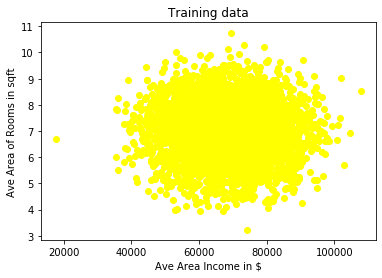

In [45]:
%matplotlib inline
plt.scatter(x_train,y_train,color='yellow')
plt.xlabel('Ave Area Income in $')
plt.ylabel('Ave Area of Rooms in sqft')
plt.title('Training data')
plt.show()

In [46]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 0.07 %
Test accuracy -0.74 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

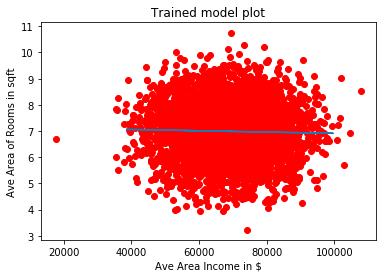

In [47]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel('Ave Area Income in $')
plt.ylabel('Ave Area of Rooms in sqft')
plt.title("Trained model plot")
plt.plot

## Comparisons Ave. Income & Ave. Area of Bedrooms
### While Test Size is 20%

In [48]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=1000)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shap {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (4000, 1)
y_train shape (4000,)
X_test shap (1000, 1)
y_test shape (1000,)
[7.67098283 6.02452319 7.65651167 8.76661274 6.46252334 6.52222048
 8.50065931 6.03645802 7.13125578 7.22911211 7.88847287 5.96140678
 5.16486548 6.65816348 8.56001888 8.54176845 7.3182145  7.316551
 8.46146827 6.9096769  7.74683647 6.15220352 8.8615771  7.8410663
 8.4513549  8.38320811 7.80189707 7.47067235 7.67923057 6.73400688
 8.00644913 8.59824688 5.74405984 5.58679444 5.0427468  6.12940457
 8.84066791 7.12398966 7.97987782 7.50381655 6.13419293 7.87459883
 7.23704281 6.31106491 6.66953171 7.47284985 6.81364961 7.16132931
 7.54589692 5.65425637 6.79627685 6.5413757  7.03385222 8.50933677
 7.24990524 8.08412347 7.73486203 7.8452404  6.42408542 6.50394588
 6.73255173 7.27878258 7.87896295 7.29698406 7.03666701 8.25904432
 7.64896367 4.98021947 6.18284258 4.9673884  5.56435288 7.40068467
 8.00541729 6.9682825  5.78918815 6.11019169 6.94214348 6.91430889
 7.42768912 6.87615033 8.28908486 5.0796706

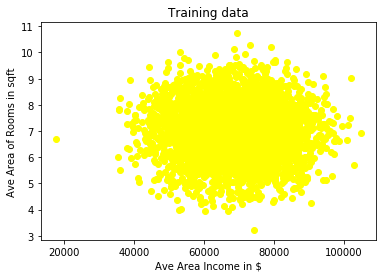

In [49]:
%matplotlib inline
plt.scatter(x_train,y_train,color='yellow')
plt.xlabel('Ave Area Income in $')
plt.ylabel('Ave Area of Rooms in sqft')
plt.title('Training data')
plt.show()

In [50]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 0.1 %
Test accuracy -0.63 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

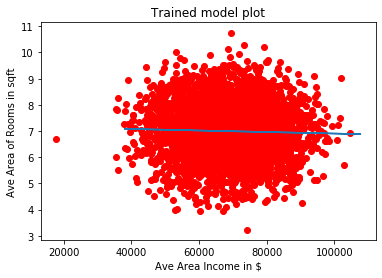

In [51]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel('Ave Area Income in $')
plt.ylabel('Ave Area of Rooms in sqft')
plt.title("Trained model plot")
plt.plot

## Comparisons Ave. Income & Ave. Area of Bedrooms
## Polynomial Regression Method
### While Test Size is 20%

In [58]:
X = US_house['Avg. Area Income'].values
y = US_house['Avg. Area Number of Rooms'].values

In [59]:
X

array([79545.45857432, 79248.64245483, 61287.06717866, ...,
       63390.6868855 , 68001.33123509, 65510.58180367])

In [60]:
X=X.reshape(-1,1)
X

array([[79545.45857432],
       [79248.64245483],
       [61287.06717866],
       ...,
       [63390.6868855 ],
       [68001.33123509],
       [65510.58180367]])

In [61]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=1000)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shap {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (4000, 1)
y_train shape (4000,)
X_test shap (1000, 1)
y_test shape (1000,)
[7.67098283 6.02452319 7.65651167 8.76661274 6.46252334 6.52222048
 8.50065931 6.03645802 7.13125578 7.22911211 7.88847287 5.96140678
 5.16486548 6.65816348 8.56001888 8.54176845 7.3182145  7.316551
 8.46146827 6.9096769  7.74683647 6.15220352 8.8615771  7.8410663
 8.4513549  8.38320811 7.80189707 7.47067235 7.67923057 6.73400688
 8.00644913 8.59824688 5.74405984 5.58679444 5.0427468  6.12940457
 8.84066791 7.12398966 7.97987782 7.50381655 6.13419293 7.87459883
 7.23704281 6.31106491 6.66953171 7.47284985 6.81364961 7.16132931
 7.54589692 5.65425637 6.79627685 6.5413757  7.03385222 8.50933677
 7.24990524 8.08412347 7.73486203 7.8452404  6.42408542 6.50394588
 6.73255173 7.27878258 7.87896295 7.29698406 7.03666701 8.25904432
 7.64896367 4.98021947 6.18284258 4.9673884  5.56435288 7.40068467
 8.00541729 6.9682825  5.78918815 6.11019169 6.94214348 6.91430889
 7.42768912 6.87615033 8.28908486 5.0796706

In [65]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x_train)
poly.fit(X_poly,y_train)

PolynomialFeatures(degree=4, include_bias=True, interaction_only=False,
                   order='C')

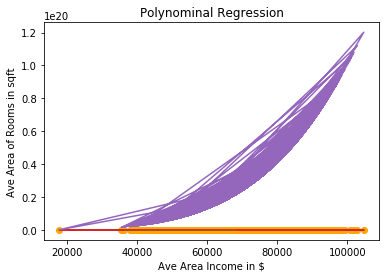

In [70]:
%matplotlib inline
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_train, poly.fit_transform(x_train))
plt.xlabel('Ave Area Income in $')
plt.ylabel('Ave Area of Rooms in sqft')
plt.title('Polynominal Regression')
plt.show()